In [1]:
#Import packages
from arcgis import GIS, GeoAccessor
import pandas as pd

In [2]:
#Connect to AGOL account
gis = GIS('pro')
#gis = GIS("https://dukeuniv.maps.arcgis.com",client_id='YmtqqKYoHULH1M2l')
#print("Successfully logged in as: " + gis.properties.user.username)

In [4]:
#Import the processed Madre de Dios data into a dataframe
df_mdd = pd.read_csv('..//data//processed/MadreDeDios_MercuryMasterData.csv',
                     parse_dates=['DateCollected'])

In [5]:
#Convert data to a spatial dataframe
sdf_mdd = GeoAccessor.from_xy(df=df_mdd,x_column='Longitude (X)',y_column='Latitude (Y)',sr={'wkid':4326})

In [6]:
sdf_mdd.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

In [16]:
#Retrieve the land cover map from the living atlas
dist_to_water = gis.content.get('46cbfa5ac94743e4933b6896f1dcecfd').layers[0]

In [19]:
hist_data = dist_to_water.compute_histograms(sdf_mdd.spatial.bbox)

In [32]:
sample_data = [dist_to_water.get_samples(sdf_mdd.loc[0,'SHAPE'])[0]['locationId']

In [37]:
sdf_mdd['LC'] = sdf_mdd['SHAPE'].apply(lambda x: dist_to_water.get_samples(x)[0]['locationId'])

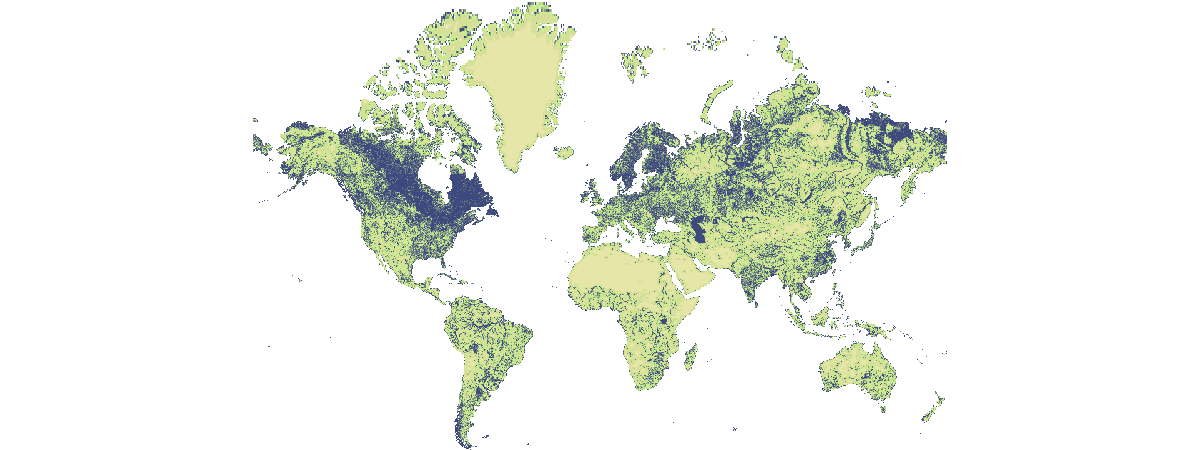

In [39]:
dist_to_water

In [38]:
sdf_mdd['LC'].describe()

count    4626.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: LC, dtype: float64